## PART1

In [1]:
import pandas as pd

In [24]:
df=pd.read_csv("avocado-prices/avocado.csv")

In [25]:
df.head(1)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


In [26]:
df.tail(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [27]:
df['Date'].head()

0    2015-12-27
1    2015-12-20
2    2015-12-13
3    2015-12-06
4    2015-11-29
Name: Date, dtype: object

In [28]:
albany=df[df['region']=='Albany']

In [29]:
albany.index # show the default index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            17603, 17604, 17605, 17606, 17607, 17608, 17609, 17610, 17611,
            17612],
           dtype='int64', length=338)

In [31]:
albany.set_index('Date', inplace=True)

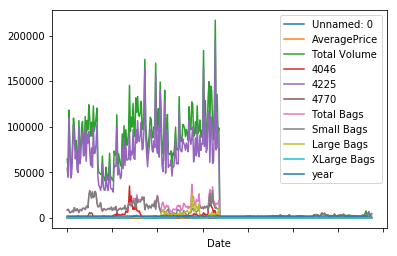

In [32]:
albany.plot() # first it won't show so run it again

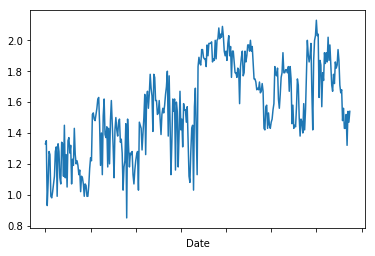

In [33]:
albany['AveragePrice'].plot()

## Part 2 visualization

In [12]:
df.shape

(18249, 14)

In [36]:
df['Date']=pd.to_datetime(df["Date"]) # to get pandas that is date

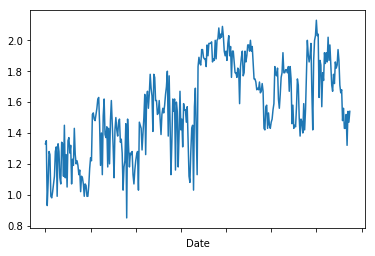

In [37]:
albany['AveragePrice'].plot() 

In [38]:
albany.index

Index(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06', '2015-11-29',
       '2015-11-22', '2015-11-15', '2015-11-08', '2015-11-01', '2015-10-25',
       ...
       '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18', '2018-02-11',
       '2018-02-04', '2018-01-28', '2018-01-21', '2018-01-14', '2018-01-07'],
      dtype='object', name='Date', length=338)

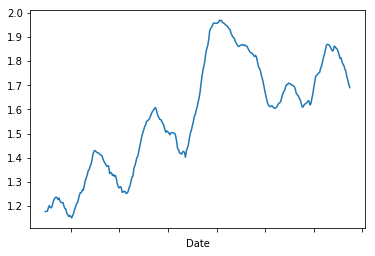

In [41]:
albany['AveragePrice'].rolling(25).mean().plot() # it will show the window of 25

In [42]:
# for proper visualization we will sort the index by date

In [43]:
albany.sort_index(inplace=True)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
albany.index

Index(['2015-01-04', '2015-01-04', '2015-01-11', '2015-01-11', '2015-01-18',
       '2015-01-18', '2015-01-25', '2015-01-25', '2015-02-01', '2015-02-01',
       ...
       '2018-02-25', '2018-02-25', '2018-03-04', '2018-03-04', '2018-03-11',
       '2018-03-11', '2018-03-18', '2018-03-18', '2018-03-25', '2018-03-25'],
      dtype='object', name='Date', length=338)

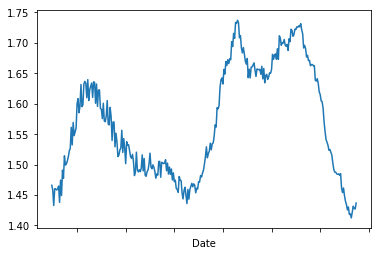

In [45]:
albany['AveragePrice'].rolling(25).mean().plot()

In [46]:
# we will add the column to df where with 25 record window

In [48]:
albany['price25ma']=albany['AveragePrice'].rolling(25).mean()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
albany.head(2)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.9,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.0,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN


In [50]:
# it is showing nan as it will show the values for 25th record

In [52]:
albany.head(26)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN
2015-01-11,50,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany,NaN
2015-01-18,49,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,NaN
2015-01-18,49,1.93,1118.47,8.02,178.78,0.00,931.67,931.67,0.00,0.0,organic,2015,Albany,NaN
2015-01-25,48,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany,NaN
2015-01-25,48,1.89,1115.89,14.87,148.72,0.00,952.30,952.30,0.00,0.0,organic,2015,Albany,NaN
2015-02-01,47,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany,NaN


In [54]:
albany.dropna().head(2) # it will show all the valuea in price25ma

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.0,884.43,884.43,0.00,0.0,organic,2015,Albany,1.466
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.5,7684.08,7208.49,475.59,0.0,conventional,2015,Albany,1.458


In [59]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [62]:
graph_df=pd.DataFrame()# it will create the empty dataframe

In [63]:
graph_df

""


In [71]:
for region in df['region'].unique()[:16]:# it will execute till 16
    print(region)
    region_df=df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma']=region_df['AveragePrice'].rolling(25).mean()# f
    

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


In [73]:
if graph_df.empty:
        graph_df=region_df[[f'{region}_price25ma']]# if will use one bracket it will create the series ,for df we need 2
else:
        graph_df=graph_df.join(region_df[f'{region}_price25ma'])    

In [75]:
# so seperately it is showing result but while combining it is wrong
for region in df['region'].unique()[:16]:# it will execute till 16
    print(region)
    region_df=df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma']=region_df['AveragePrice'].rolling(25).mean()# f
    if graph_df.empty:
        graph_df=region_df[[f'{region}_price25ma']]# if will use one bracket it will create the series ,for df we need 2
    else:
        graph_df=graph_df.join(region_df[f'{region}_price25ma'])    


Albany


ValueError: columns overlap but no suffix specified: Index(['Albany_price25ma'], dtype='object')

In [79]:
df.type.unique() # unquie function will help to create the group

array(['conventional', 'organic'], dtype=object)

In [83]:
import pandas as pd
df=pd.read_csv("avocado-prices/avocado.csv")
df=df.copy()[df['type']=='organic']
df['Date']=pd.to_datetime(df['Date'])
df.sort_values(by="Date",ascending=True,inplace=True)


In [84]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9489,51,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.0,organic,2015,LasVegas


In [85]:
for region in df['region'].unique()[:16]:# it will execute till 16
    print(region)
    region_df=df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma']=region_df['AveragePrice'].rolling(25).mean()# f
    if graph_df.empty:
        graph_df=region_df[[f'{region}_price25ma']]# if will use one bracket it will create the series ,for df we need 2
    else:
        graph_df=graph_df.join(region_df[f'{region}_price25ma'])    


California
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Boston
StLouis
Louisville
Orlando
Southeast
Boise
MiamiFtLauderdale
NorthernNewEngland
BaltimoreWashington


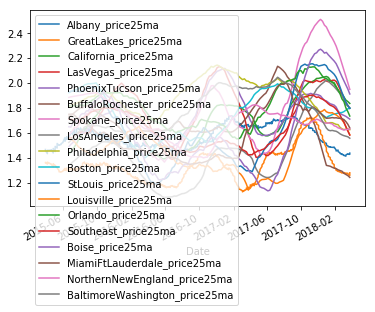

In [86]:
graph_df.plot()

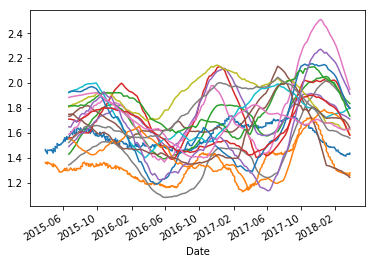

In [87]:
graph_df.plot(legend=False)

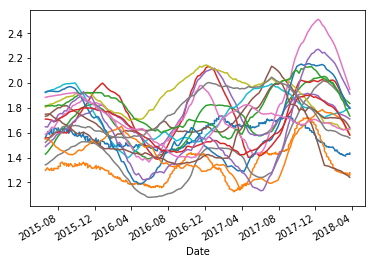

In [89]:
# remove the gap 
graph_df.dropna().plot(legend=False)